# Water Potability Prediction

In this project, we will be prediciting if the water is save for human consumption based on the water quality metrics

<b> Importing Libraries <b>

In [71]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle

# Model and Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
file_path = '/Users/monicaleo/Downloads/water.csv'
wp = pd.read_csv(file_path)

In [3]:
wp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<font size="4"> <b> Exploratory Data Analysis </font> <b>

In [4]:
wp.shape

(3276, 10)

In [5]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
wp.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
wp.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We can see that we have missing values in the data, so we will remove the missing values 

In [14]:
wp = wp.dropna()

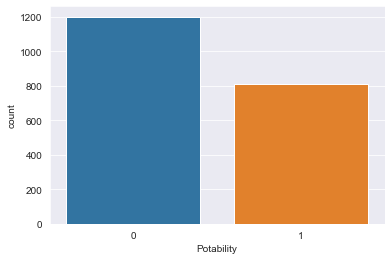

In [16]:
sns.set_style("darkgrid")
sns.countplot(x='Potability',data=wp)

In [18]:
wp['Potability'].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [73]:
# Resampling the data
np  = wp[wp['Potability']==0]
p = wp[wp['Potability']==1]

wp_minority_upsampled = resample(p, replace = True, n_samples = 1200) 

wp = pd.concat([np, wp_minority_upsampled])
wp = shuffle(wp)

In [74]:
wp.Potability.value_counts()

1    1200
0    1200
Name: Potability, dtype: int64

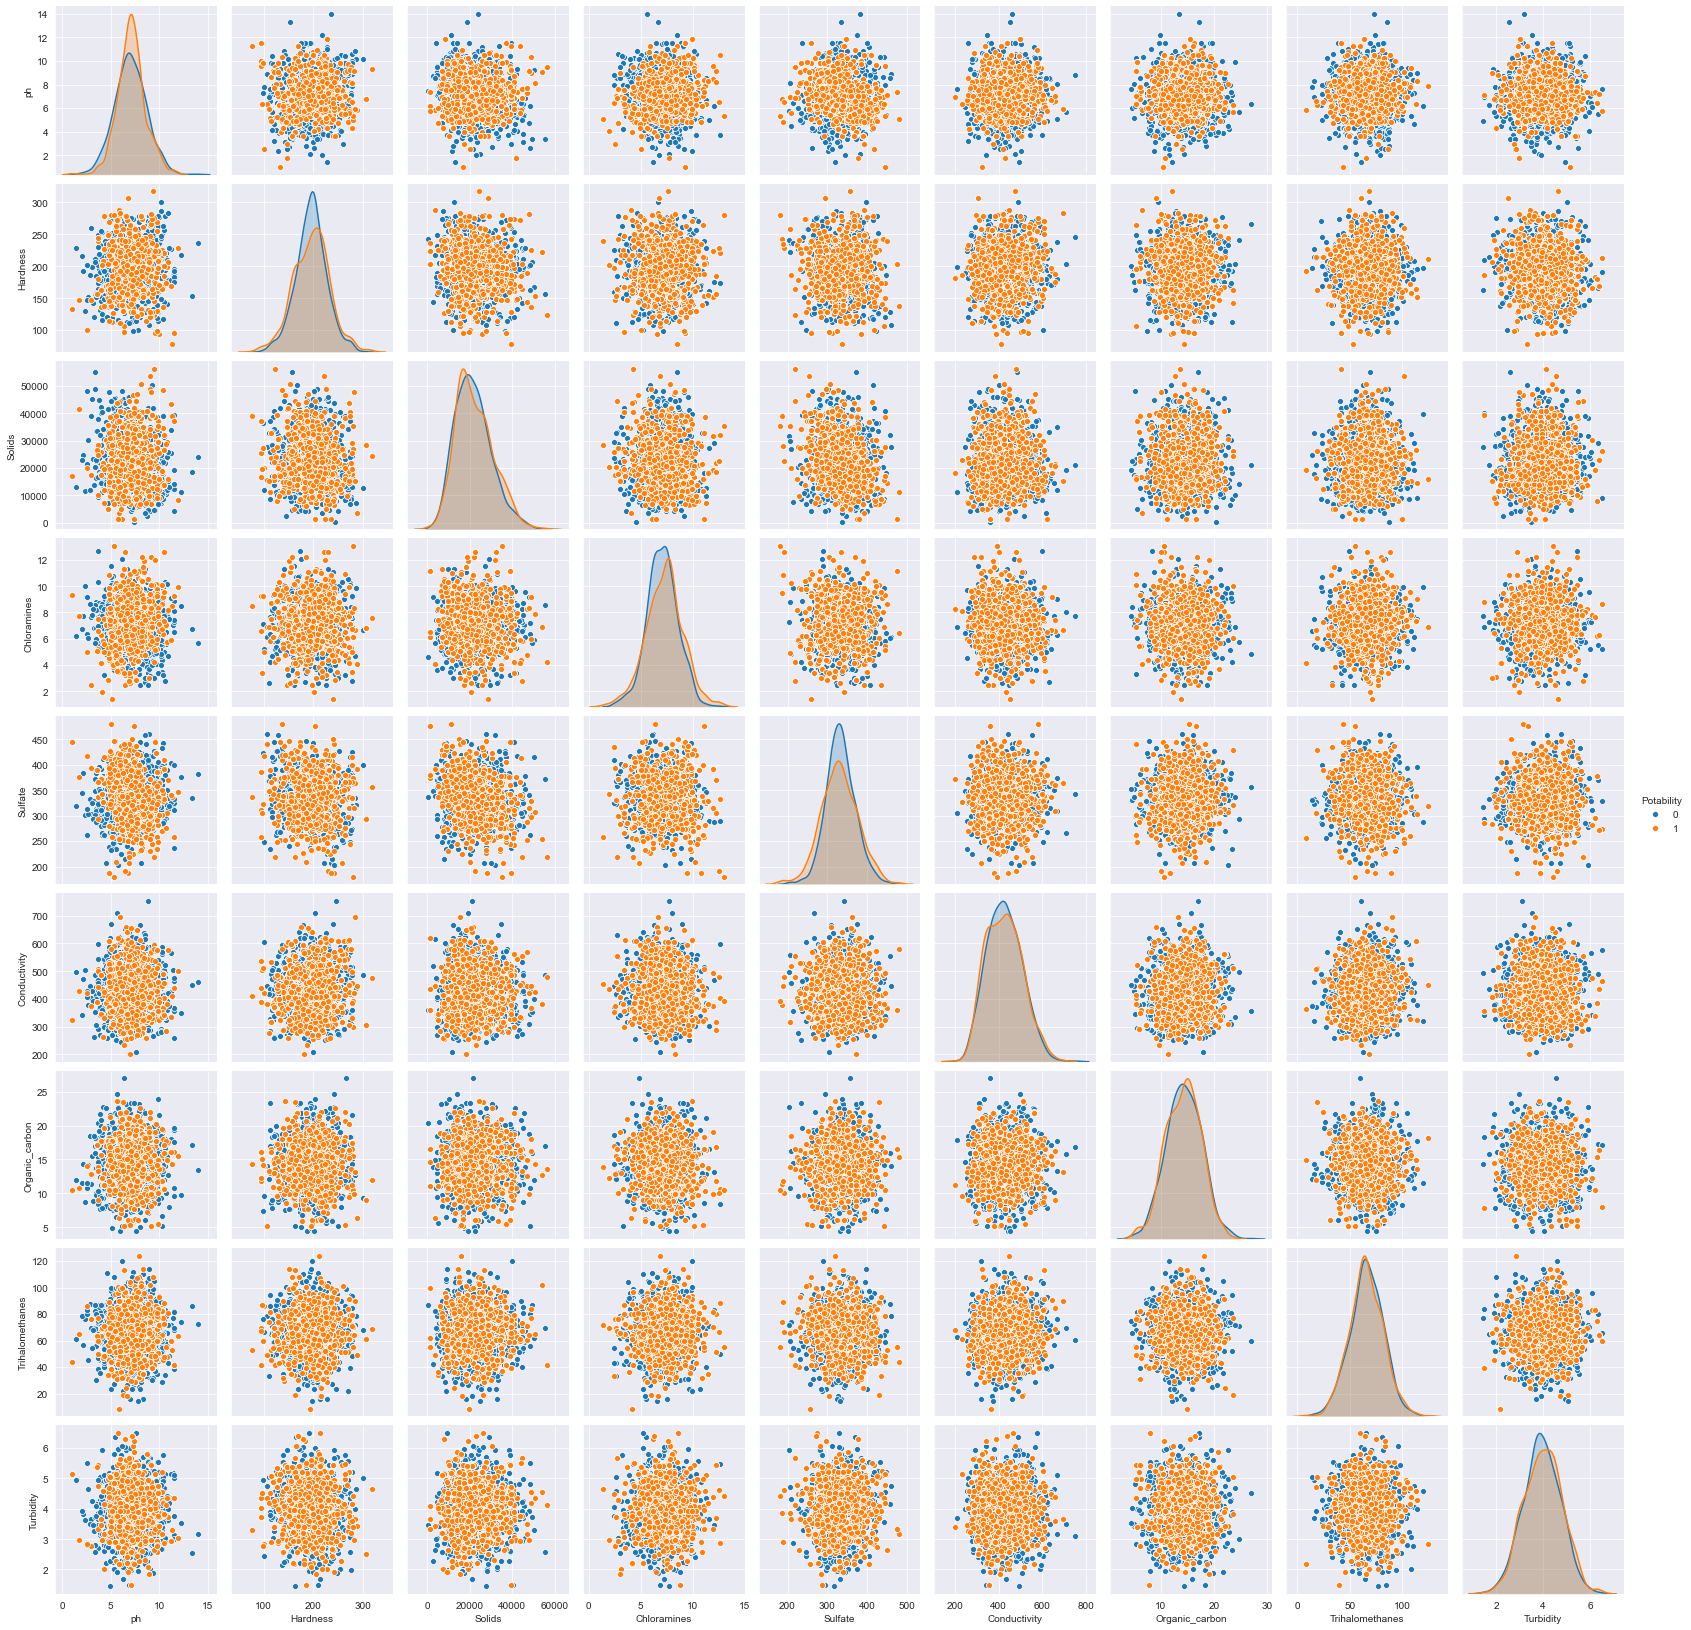

In [75]:
sns.pairplot(wp, hue = 'Potability')

In [76]:
wp.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.081642,-0.062210,0.028997,-0.011121,0.007149,0.013767,0.019174,-0.043397,0.029999
Hardness,0.081642,1.000000,-0.068210,-0.007820,-0.080969,-0.000754,-0.001213,-0.008567,-0.043662,0.006755
Solids,-0.062210,-0.068210,1.000000,-0.063196,-0.198584,0.011867,0.001211,-0.007281,0.009144,0.043014
Chloramines,0.028997,-0.007820,-0.063196,1.000000,0.003680,-0.047909,-0.060649,0.013801,0.009699,0.060561
Sulfate,-0.011121,-0.080969,-0.198584,0.003680,1.000000,-0.019428,0.041796,-0.052724,-0.015983,-0.033474
Conductivity,0.007149,-0.000754,0.011867,-0.047909,-0.019428,1.000000,0.041882,0.032814,0.007216,-0.004882
Organic_carbon,0.013767,-0.001213,0.001211,-0.060649,0.041796,0.041882,1.000000,0.002961,0.008126,-0.023053
Trihalomethanes,0.019174,-0.008567,-0.007281,0.013801,-0.052724,0.032814,0.002961,1.000000,-0.017614,-0.010445
Turbidity,-0.043397,-0.043662,0.009144,0.009699,-0.015983,0.007216,0.008126,-0.017614,1.000000,0.036988
Potability,0.029999,0.006755,0.043014,0.060561,-0.033474,-0.004882,-0.023053,-0.010445,0.036988,1.000000


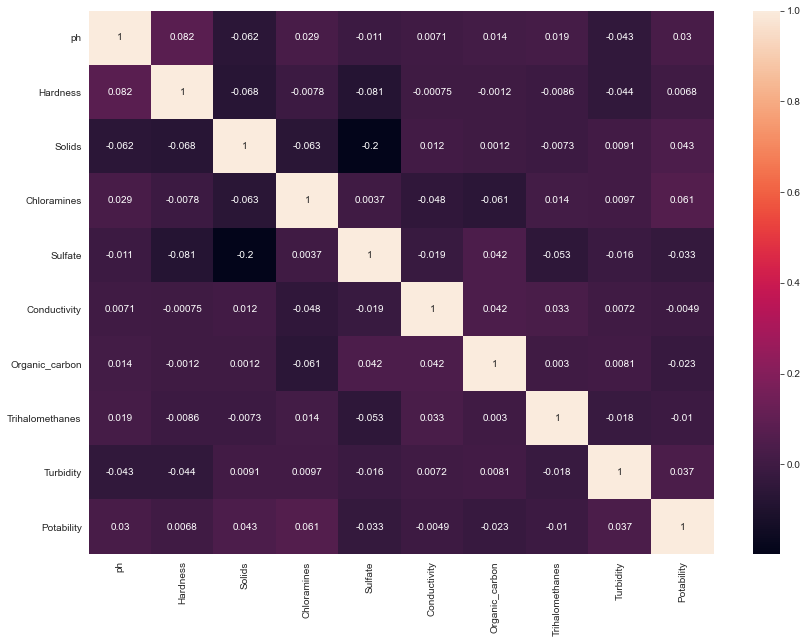

In [77]:
plt.figure(figsize=(14,10))
sns.heatmap(wp.corr(), annot=True)

<font size="4"> <b> Splitting and Scaling the Data </font> <b>

In [78]:
X = wp.drop(['Potability'], axis = 1)
Y = wp['Potability']

In [79]:
# Train-test split 30-70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, 
                                                    random_state=101)

In [80]:
#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<font size="4"> <b> Models and Accuracy </font> <b>

In [81]:
def models(X_train,y_train):
    
    #Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    decision_tree.fit(X_train, y_train)
    
    #Random Forest
    random_forest = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
    random_forest.fit(X_train, y_train)
    
    #KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    
    #Model Accuracy on Training Data
    print('[0]Logistic Regression Training Acc:', log.score(X_train,y_train))
    print('[1]Decision Tree Training Acc:', decision_tree.score(X_train,y_train))
    print('[2]Random Forest Training Acc:', random_forest.score(X_train,y_train))
    print('[3]KNN Training Acc:', knn.score(X_train,y_train))
    
    return log, decision_tree, random_forest, knn

In [82]:
model = models(X_train,y_train)

[0]Logistic Regression Training Acc: 0.5279761904761905
[1]Decision Tree Training Acc: 1.0
[2]Random Forest Training Acc: 0.9886904761904762
[3]KNN Training Acc: 0.8630952380952381


In [83]:
# Accuracy on Testing Data

for i in range(len(model)):
    print('Model ', i)
    cm = confusion_matrix(y_test, model[i].predict(X_test))

    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[1][0]
    fn = cm[0][1]

    print(cm)
    print('Testing Acc = ', (tp + tn)/(tp +tn +fn + fp))
    print()

Model  0
[[204 154]
 [185 177]]
Testing Acc =  0.5291666666666667

Model  1
[[241 117]
 [110 252]]
Testing Acc =  0.6847222222222222

Model  2
[[316  42]
 [116 246]]
Testing Acc =  0.7805555555555556

Model  3
[[242 116]
 [101 261]]
Testing Acc =  0.6986111111111111

